In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('first_look_data.csv')

## EDA and check data for extra impurities.

In [3]:
data.head()

,RelativeHumidity,CurrentConditions,Temperature_Celsius,Dewpoint_Celsius,FeelsLike_Celsius,Pressure_Millibar,SunInfo_IsSunUp,MoonInfo_Phase,MoonInfo_PhaseName,MoonInfo_Illumination,...,MoonInfo_IsMoonUp,Precipitation_Hour_Cm,Precipitation_Year_Cm,Precipitation_Month_Cm,Precipitation_Week_Cm,Precipitation_Day_Cm,Wind_X,Wind_Y,Wind_Gust_KilometersPerHour,datetime
0,0.509,Clear Skies,13,3,13,1015.92,True,0.546387,Full Moon,0.978913,...,True,0.0,11.28,0.0,3.86,0.0,-7.287577,-1.284997,0.0,2018-05-01 05:55:00
1,0.368,Scattered,27,11,27,1015.58,True,0.554403,Full Moon,0.971072,...,True,0.0,11.28,0.0,3.86,0.0,-15.491181,-18.461671,42.6,2018-05-01 11:55:00
2,0.303,Clear Skies,28,9,28,1012.87,True,0.562377,Full Moon,0.962088,...,True,0.0,11.28,0.0,3.86,0.0,-21.862732,-3.854990,37.0,2018-05-01 17:55:00
3,0.468,Clear Skies,23,11,23,1013.89,False,0.570309,Waning Gibbous,0.951999,...,True,0.0,11.28,0.0,3.86,0.0,-22.646592,-8.242685,33.3,2018-05-01 23:55:00
4,0.530,Clear Skies,21,11,21,1012.87,True,0.578202,Waning Gibbous,0.940846,...,True,0.0,11.28,0.0,3.86,0.0,-12.817176,-7.400000,0.0,2018-05-02 05:55:00


Looking at this we have a problem, there is not a clear goal with the dataset.

For this assignment I will use Temperature_Celsius, but we have some extra temperature information that we shouldn't use because of leakage.

In [4]:
data = data.drop(['Dewpoint_Celsius', 'FeelsLike_Celsius'], axis=1)

In [5]:
all_column_names = data.columns
numeric_column_names = data._get_numeric_data().columns
numeric_column_names

Index(['RelativeHumidity', 'Temperature_Celsius', 'Pressure_Millibar',
       'SunInfo_IsSunUp', 'MoonInfo_Phase', 'MoonInfo_Illumination',
       'MoonInfo_Age', 'MoonInfo_IsMoonUp', 'Precipitation_Hour_Cm',
       'Precipitation_Year_Cm', 'Precipitation_Month_Cm',
       'Precipitation_Week_Cm', 'Precipitation_Day_Cm', 'Wind_X', 'Wind_Y',
       'Wind_Gust_KilometersPerHour'],
      dtype='object')

In [6]:
categorical_column_names = set(all_column_names) - set(numeric_column_names)
categorical_column_names.remove('datetime')
categorical_column_names

{'CurrentConditions', 'MoonInfo_PhaseName'}

In [7]:
cat_frame = data[categorical_column_names]
cat_frame = pd.get_dummies(cat_frame)
cat_frame.head()

C:\Users\turne\AppData\Local\Temp\ipykernel_15656\3375366326.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cat_frame = data[categorical_column_names]


,MoonInfo_PhaseName_First Quarter,MoonInfo_PhaseName_Full Moon,MoonInfo_PhaseName_New Moon,MoonInfo_PhaseName_Third Quarter,MoonInfo_PhaseName_Waning Crescent,MoonInfo_PhaseName_Waning Gibbous,MoonInfo_PhaseName_Waxing Crescent,MoonInfo_PhaseName_Waxing Gibbous,CurrentConditions_/ Broken Sky,CurrentConditions_/ Overcast Sky,...,CurrentConditions_Overcast Sky,CurrentConditions_Rain,CurrentConditions_Scattered,CurrentConditions_Snow,CurrentConditions_Strong Drizzle,CurrentConditions_Strong Rain,CurrentConditions_Strong Snow,"CurrentConditions_Strong Thunderstorms, Rain",CurrentConditions_Thunderstorms,"CurrentConditions_Thunderstorms, Rain"
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data.drop(categorical_column_names, axis=1)
data = pd.concat([data, cat_frame], axis=1)

In [9]:
bool_mask = data.dtypes == bool
int_data = data.loc[:,bool_mask.values].astype(int)
bool_columns = bool_mask[bool_mask == True].keys()

In [10]:
data = data.drop(bool_columns, axis=1)
data = pd.concat([data, int_data], axis=1)

In [11]:
data.head()

,RelativeHumidity,Temperature_Celsius,Pressure_Millibar,MoonInfo_Phase,MoonInfo_Illumination,MoonInfo_Age,Precipitation_Hour_Cm,Precipitation_Year_Cm,Precipitation_Month_Cm,Precipitation_Week_Cm,...,CurrentConditions_Scattered,CurrentConditions_Snow,CurrentConditions_Strong Drizzle,CurrentConditions_Strong Rain,CurrentConditions_Strong Snow,"CurrentConditions_Strong Thunderstorms, Rain",CurrentConditions_Thunderstorms,"CurrentConditions_Thunderstorms, Rain",SunInfo_IsSunUp,MoonInfo_IsMoonUp
0,0.509,13,1015.92,0.546387,0.978913,16.14,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,0,1,1
1,0.368,27,1015.58,0.554403,0.971072,16.37,0.0,11.28,0.0,3.86,...,1,0,0,0,0,0,0,0,1,1
2,0.303,28,1012.87,0.562377,0.962088,16.61,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,0,1,1
3,0.468,23,1013.89,0.570309,0.951999,16.84,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,0,0,1
4,0.530,21,1012.87,0.578202,0.940846,17.07,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,0,1,1


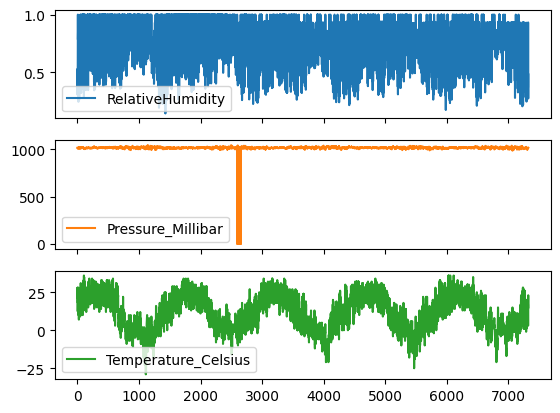

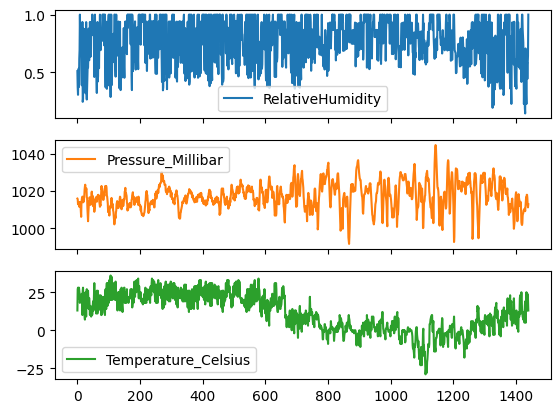

In [12]:
plot_columns = ['RelativeHumidity', 'Pressure_Millibar', 'Temperature_Celsius']
plot_features = data[plot_columns]
_ = plot_features.plot(subplots=True)

plot_features = data[plot_columns][:4*30*12]
_ = plot_features.plot(subplots=True)

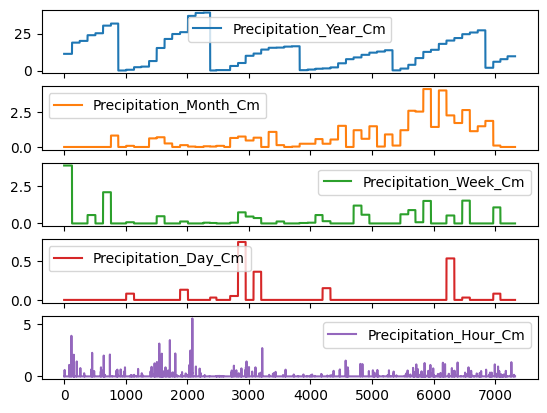

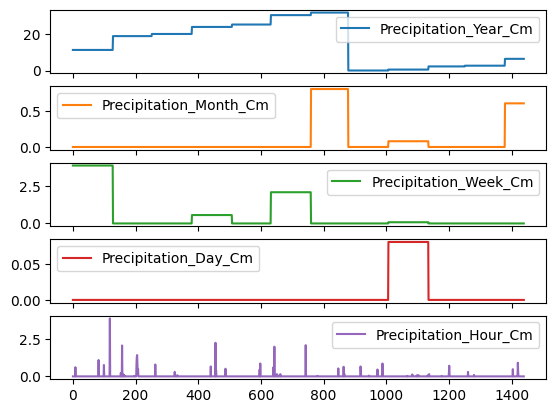

In [13]:
plot_columns = ['Precipitation_Year_Cm', 'Precipitation_Month_Cm', 'Precipitation_Week_Cm', 'Precipitation_Day_Cm', 'Precipitation_Hour_Cm']
plot_features = data[plot_columns]
_ = plot_features.plot(subplots=True)

plot_features = data[plot_columns][:4*30*12]
_ = plot_features.plot(subplots=True)

In [14]:
data['Pressure_Millibar'].describe().transpose()

count    7324.000000
mean     1014.727720
std        46.521521
min         0.000000
25%      1012.530000
50%      1016.600000
75%      1021.340000
max      1044.700000
Name: Pressure_Millibar, dtype: float64

In [15]:
pressure_m = data['Pressure_Millibar']
average_preasure = pressure_m[pressure_m != 0].mean()
pressure_m[pressure_m == 0] = average_preasure
data['Preassure_Millibar'] = pressure_m


C:\Users\turne\AppData\Local\Temp\ipykernel_15656\235254182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure_m[pressure_m == 0] = average_preasure


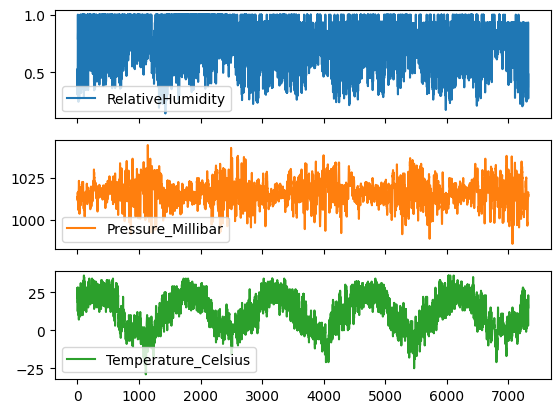

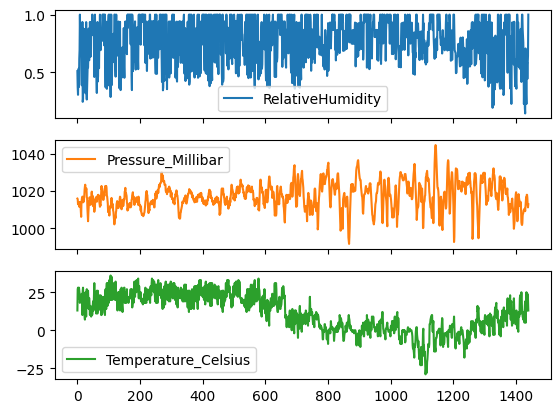

In [16]:
plot_columns = ['RelativeHumidity', 'Pressure_Millibar', 'Temperature_Celsius']
plot_features = data[plot_columns]
_ = plot_features.plot(subplots=True)

plot_features = data[plot_columns][:4*30*12]
_ = plot_features.plot(subplots=True)

In [17]:
data.head()

,RelativeHumidity,Temperature_Celsius,Pressure_Millibar,MoonInfo_Phase,MoonInfo_Illumination,MoonInfo_Age,Precipitation_Hour_Cm,Precipitation_Year_Cm,Precipitation_Month_Cm,Precipitation_Week_Cm,...,CurrentConditions_Snow,CurrentConditions_Strong Drizzle,CurrentConditions_Strong Rain,CurrentConditions_Strong Snow,"CurrentConditions_Strong Thunderstorms, Rain",CurrentConditions_Thunderstorms,"CurrentConditions_Thunderstorms, Rain",SunInfo_IsSunUp,MoonInfo_IsMoonUp,Preassure_Millibar
0,0.509,13,1015.92,0.546387,0.978913,16.14,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,1,1,1015.92
1,0.368,27,1015.58,0.554403,0.971072,16.37,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,1,1,1015.58
2,0.303,28,1012.87,0.562377,0.962088,16.61,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,1,1,1012.87
3,0.468,23,1013.89,0.570309,0.951999,16.84,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,0,1,1013.89
4,0.530,21,1012.87,0.578202,0.940846,17.07,0.0,11.28,0.0,3.86,...,0,0,0,0,0,0,0,1,1,1012.87


Let's make some sin / cos curves for the day/month/year.

In [18]:
import numpy as np

Let's do a quick fft and see what signals we should add to the data.

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
labels = data.Temperature_Celsius

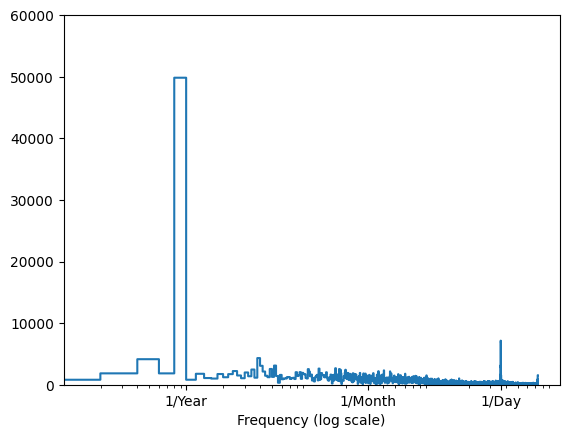

In [21]:
# @Author Google TF
fft = tf.signal.rfft(labels)
frequencies_per_dataset = np.arange(0, len(fft))

n_samples_h = len(labels)
samples_per_day = 4*365
years_per_dataset = n_samples_h/(samples_per_day)

f_per_year = frequencies_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 60000)
plt.xlim([0.1, max(plt.xlim())])

frequencies_of_interest = [1, 30, 365]
plot_xticks = ['1/Year', '1/Month', '1/Day']

plt.xticks(frequencies_of_interest, labels=plot_xticks)
_ = plt.xlabel('Frequency (log scale)')

In [22]:
datetime = pd.to_datetime(data['datetime'], format='%Y/%m/%d %H:%M')
timestamp_seconds = datetime.map(pd.Timestamp.timestamp)

data['day_sin'] = np.sin(timestamp_seconds * (2 * np.pi / 60*60*24))
data['day_cos'] = np.cos(timestamp_seconds * (2 * np.pi / 60*60*24))
data['year_sin'] = np.sin(timestamp_seconds * (2 * np.pi / 60*60*24*365))
data['year_cos'] = np.cos(timestamp_seconds * (2 * np.pi / 60*60*24*365))

Alrighty then, we can move to splitting normalizing and modeling some of this data.  

In [23]:
data.to_csv('eda_data.csv', index=False)